In [1]:
import networkx as nx
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.0


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# nx.draw makes warnings with matplotlib
import warnings
warnings.filterwarnings('ignore')

## Networkx basics

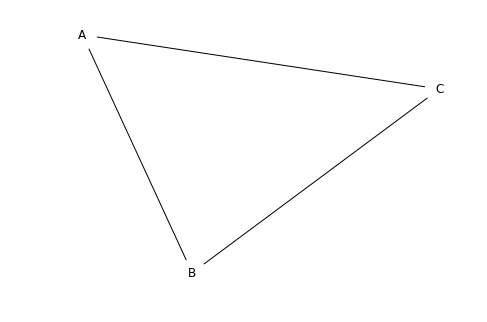

In [4]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C')])
nx.draw(G, node_size=800, node_color='white', with_labels=True)

In [5]:
G.edges

EdgeView([('A', 'B'), ('A', 'C'), ('B', 'C')])

In [6]:
G.nodes

NodeView(('A', 'B', 'C'))

In [7]:
list(G.adjacency())

[('A', {'B': {}, 'C': {}}),
 ('B', {'A': {}, 'C': {}}),
 ('C', {'A': {}, 'B': {}})]

In [8]:
print(nx.adjacency_matrix(G))

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (2, 0)	1
  (2, 1)	1


In [9]:
nx.to_numpy_matrix(G)

matrix([[ 0.,  1.,  1.],
        [ 1.,  0.,  1.],
        [ 1.,  1.,  0.]])

In [10]:
'A' in G

True

In [11]:
G['A']

AtlasView({'B': {}, 'C': {}})

In [12]:
len(G)

3

#### Adding nodes and edges

In [13]:
# One node at a time
G.add_node(1)  # "method" of G
# A list of nodes
G.add_nodes_from([2, 3])

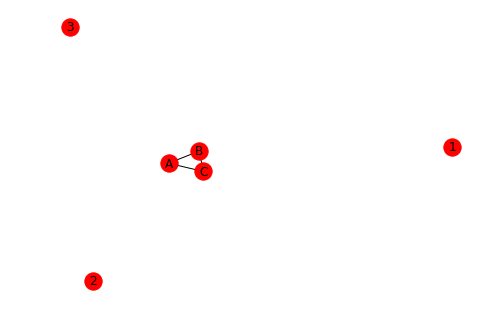

In [14]:
nx.draw(G, node_size=300, node_color='red', with_labels=True)

In [15]:
# Adding a single edge
G.add_edge(1, 2)
# Add a list of edges 
G.add_edges_from([(1, 2), (1, 3)])

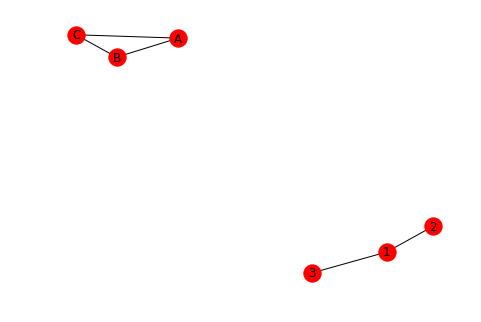

In [16]:
nx.draw(G, node_size=300, node_color='red', with_labels=True)

In [17]:
G.remove_node(2)

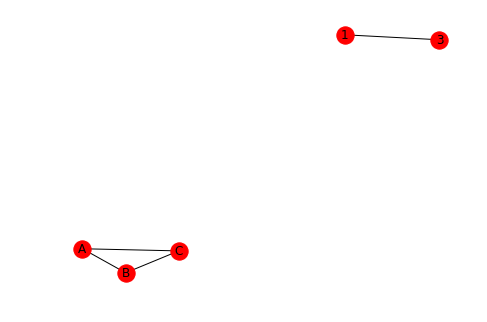

In [18]:
nx.draw(G, node_size=300, node_color='red', with_labels=True)

In [19]:
G.remove_edges_from([('A','B'),(1,3)])

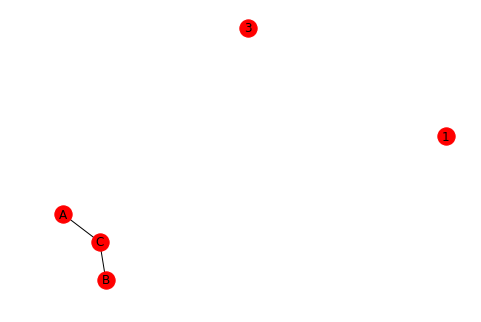

In [20]:
nx.draw(G, node_size=300, node_color='red', with_labels=True)

In [21]:
G.remove_nodes_from([1,3])

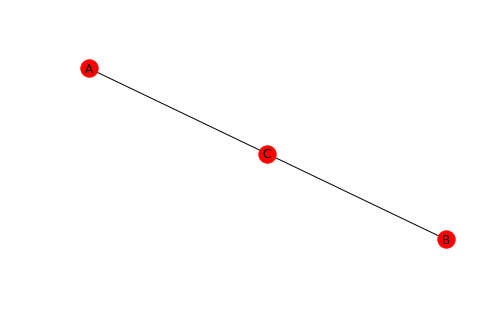

In [22]:
nx.draw(G, node_size=300, node_color='red', with_labels=True)

#### Node and edge attributes

In [23]:
G.add_node('A', name='aaa')

In [24]:
G.node['A']

{'name': 'aaa'}

In [25]:
nx.set_node_attributes(G, {'B': 'bbb', 'C': 'ccc'}, 'name')

In [26]:
nx.get_node_attributes(G, 'name')

{'A': 'aaa', 'B': 'bbb', 'C': 'ccc'}

In [27]:
list(G.nodes(data=True))

[('A', {'name': 'aaa'}), ('B', {'name': 'bbb'}), ('C', {'name': 'ccc'})]

In [28]:
nx.set_edge_attributes(G, {('A','B'): .1, ('B','C'): 1, ('C','A'): .5}, 'weight')

In [29]:
nx.get_edge_attributes(G, 'weight')

{('A', 'C'): 0.5, ('B', 'C'): 1}

In [30]:
list(G.edges(data=True))

[('A', 'C', {'weight': 0.5}), ('B', 'C', {'weight': 1})]

## Florentine families

#### Import graph and visualize

In [31]:
G = nx.florentine_families_graph() # nodetype converts from str to int

In [32]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 15
Number of edges: 20
Average degree:   2.6667


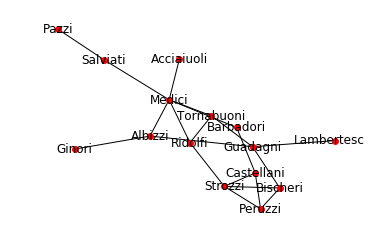

In [33]:
spring_pos = nx.spring_layout(G, scale=5)
#plt.figure(3,figsize=(1,1)) 
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, with_labels = True, node_size = 35)

#### Basic stuff

In [34]:
G.degree() # compute degree for each node

DegreeView({'Acciaiuoli': 1, 'Medici': 6, 'Castellani': 3, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 2, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 2, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 4, 'Ginori': 1, 'Lamberteschi': 1})

In [35]:
list(G.neighbors('Medici')) # get neighbour of node 0

['Acciaiuoli', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati']

In [36]:
G['Medici'] # also, with edge labels 

AtlasView({'Acciaiuoli': {}, 'Barbadori': {}, 'Ridolfi': {}, 'Tornabuoni': {}, 'Albizzi': {}, 'Salviati': {}})

#### Paths: apply the [path commands from Networkx](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html) to study the paths between 'Lamberteschi' and 'Medici'

#### The python zip command: use zip to compute the list of edges of the shortest path between 'Lamberteschi' and 'Medici'. Also: what is the command for the reverse operation for `zip`?

In [50]:
L, M = [1,2,3], ['a','b','c']
N = list(zip(L,M))
N

[(1, 'a'), (2, 'b'), (3, 'c')]

#### Centrality: apply the [centrality functions from NetworkX](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.centrality.html) to compute the centralities of different nodes. Use the following method to sort in order of decreasing centrality. What do you observe when you look at the most central family? 

In [54]:
A = {'one':1, 'two':2, 'three': 3}
sorted(A, key=A.get, reverse=True)

['three', 'two', 'one']

#### Degree centrality: compute a dictionary `degc` containing the degree centralities

#### Closeness centrality: compute a dictionary `closc` containing the closeness centralities

#### Betweenness centrality: compute a dictionary `betc` containing the betweenness centralities

#### Eigenvector Centrality: compute a dictionary `eigc` containing the eigenvector centralities

#### Plotting centralities (Pandas has everything!)

In [79]:
import pandas as pd
centrality_measures = {
    'degree': degc,
    'betweenness': betc,
    'closeness': closc,
    'eigenvector': eigc,
}
centrality = pd.DataFrame(centrality_measures)
centrality

,betweenness,closeness,degree,eigenvector
Acciaiuoli,0.000000,0.368421,0.071429,0.132157
Albizzi,0.212454,0.482759,0.214286,0.243961
Barbadori,0.093407,0.437500,0.142857,0.211706
Bischeri,0.104396,0.400000,0.214286,0.282794
Castellani,0.054945,0.388889,0.214286,0.259020
Ginori,0.000000,0.333333,0.071429,0.074925
Guadagni,0.254579,0.466667,0.285714,0.289117
Lamberteschi,0.000000,0.325581,0.071429,0.088793
Medici,0.521978,0.560000,0.428571,0.430315
Pazzi,0.000000,0.285714,0.071429,0.044815


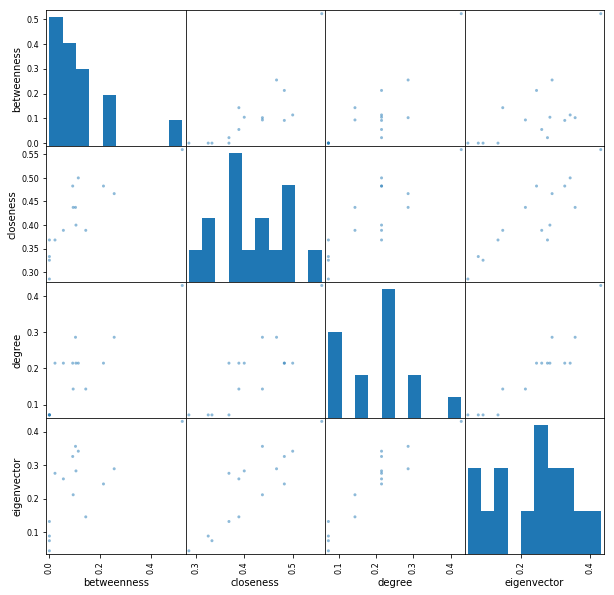

In [80]:
pd.scatter_matrix(centrality, figsize=(10,10));

## Application to actor graph

#### Creating the graph
`imdb_actor_edges.csv` contains lines of the form `actorID1, actorID2, number_of_common_movies`. Read this file with `nx.read_edgelist` (check the documentation) to create a graph `act` where the nodes are actorIDs and the edge weights are the number of common movies

In [57]:
# Use nx.info to get information on the graph
print(nx.info(act))

NameError: name 'act' is not defined

In [103]:
# restrict to largest connected component
act = max(nx.connected_component_subgraphs(act), key=len)
print(nx.info(act))

Name: 
Type: Graph
Number of nodes: 17455
Number of edges: 286911
Average degree:  32.8744


#### Compute degree centrality, betweenness centrality, closeness centrality, eigenvector centrality for all vertices of this graph. For each centrality find the 20 actor IDs with highest values and use the file `imdb_actors_key.csv` to get the name and main genre of the actors. Try to explain the differences between the lists. Look for help on the web if you get errors. Some centrality measures may take a long time to compute.

In [63]:
actors = pd.read_csv("imdb_actors_key_utf.csv", sep='\t')
actors = actors.set_index('ID')
actors.head()

,name,movies_95_04,main_genre,genres
ID,,,,
15629,"Rudder, Michael (I)",12,Thriller,"Action:1,Comedy:1,Drama:1,Fantasy:1,Horror:1,N..."
5026,"Morgan, Debbi",16,Drama,"Comedy:2,Documentary:1,Drama:6,Horror:2,NULL:3..."
11252,"Bellows, Gil",33,Drama,"Comedy:6,Documentary:1,Drama:7,Family:1,Fantas..."
5150,"Dray, Albert",20,Comedy,"Comedy:6,Crime:1,Documentary:1,Drama:4,NULL:5,..."
4057,"Daly, Shane (I)",18,Drama,"Comedy:2,Crime:1,Drama:7,Horror:1,Music:1,Musi..."


In [64]:
actors.loc[5026]

name                                                Morgan, Debbi
movies_95_04                                                   16
main_genre                                                  Drama
genres          Comedy:2,Documentary:1,Drama:6,Horror:2,NULL:3...
Name: 5026, dtype: object

In [65]:
actors.loc[5026,'name']

'Morgan, Debbi'

## Community detection

Try to use the [Divisive clustering function in NetworkX](https://networkx.github.io/documentation/latest/reference/algorithms/community.html#module-networkx.algorithms.community.centrality) to detect communities in the actor graph. Use [code snippet](http://perso.crans.org/aynaud/communities/) to draw the graph with colors. Also try to draw the graph with colors from each actors main genre. Warning: may take a very long time!  